In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sc

In [4]:
def f(x, alpha_damage_propagation, disease_rate, t=None):
    return (1-x)*(alpha_damage_propagation*x + disease_rate)

In [30]:
a = 0.0 #Initial year
b = 100 #Final year

alpha_damage_propagation = 0.031 #Alpha initial value
coupling_factor = 0.089 #Initial value of coupling factir
mortality_rate = 4.3*(10**(-5)) #Initial value of mortality rate
disease_rate = 0.01 #Initial value of disease rate


N = 100

x_points = []
temporal_points = []
gompertz_data = []
range_disease_rate = [disease_rate*0.01, disease_rate, disease_rate*10]
for d in range_disease_rate:
    x = 0.0 #Initial condition
    h = (b-a)/N
    temporal_individuals_points = np.arange(a,b,h)
    x_individual_points = []
    for t in temporal_individuals_points:
        x_individual_points.append(x)
        k1 = h*f(x, alpha_damage_propagation, d, t=t)
        k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
        x += k2
    x_individual_points = np.array(x_individual_points)
    gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha_damage_propagation))
    gompertz_data.append(gompertz_individual)
    x_points.append(x_individual_points)
    temporal_points.append(temporal_individuals_points)

In [31]:
[disease_rate*0.5, disease_rate, disease_rate*2]

[0.005, 0.01, 0.02]

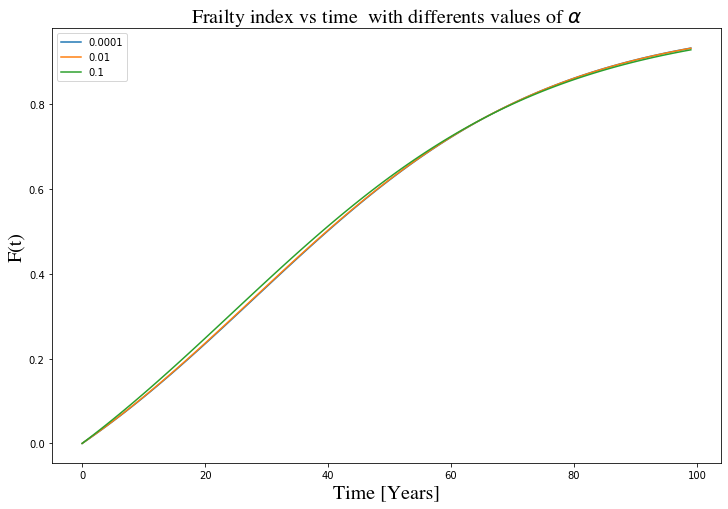

In [32]:
plt.figure(figsize=(12,8))
for i in range(len(range_disease_rate)):
    plt.plot(temporal_points[i], x_points[i], label = f"{round(range_disease_rate[i],4)}")
#plt.plot(temporal_points[5], x_points[5], "*", color = "red", label = "Initial_value")
hfont = {'fontname':'Times'}
plt.title(r"Frailty index vs time  with differents values of $\alpha$", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel("F(t)", fontsize = 20, **hfont)
plt.legend()
#plt.savefig("FI_alpha_modification.jpg", dpi = 500)
plt.show()

In [33]:
import scipy